In [39]:
import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [109]:
df=pd.read_csv('world-happiness-report.csv')

In [110]:
df.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


In [111]:
df.nunique(axis=0)

Country name                         166
year                                  16
Life Ladder                         1553
Log GDP per capita                  1500
Social support                       455
Healthy life expectancy at birth     828
Freedom to make life choices         535
Generosity                           609
Perceptions of corruption            572
Positive affect                      431
Negative affect                      374
dtype: int64

In [112]:
print(df.shape)

(1949, 11)


In [113]:
df.describe()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,1949.000000,1949.000000,1913.000000,1936.000000,1894.000000,1917.000000,1860.000000,1839.000000,1927.000000,1933.000000
mean,2013.216008,5.466705,9.368453,0.812552,63.359374,0.742558,0.000103,0.747125,0.710003,0.268544
std,4.166828,1.115711,1.154084,0.118482,7.510245,0.142093,0.162215,0.186789,0.107100,0.085168
min,2005.000000,2.375000,6.635000,0.290000,32.300000,0.258000,-0.335000,0.035000,0.322000,0.083000
25%,2010.000000,4.640000,8.464000,0.749750,58.685000,0.647000,-0.113000,0.690000,0.625500,0.206000
50%,2013.000000,5.386000,9.460000,0.835500,65.200000,0.763000,-0.025500,0.802000,0.722000,0.258000
75%,2017.000000,6.283000,10.353000,0.905000,68.590000,0.856000,0.091000,0.872000,0.799000,0.320000
max,2020.000000,8.019000,11.648000,0.987000,77.100000,0.985000,0.698000,0.983000,0.944000,0.705000


In [114]:
df.isnull().sum()

Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                   36
Social support                       13
Healthy life expectancy at birth     55
Freedom to make life choices         32
Generosity                           89
Perceptions of corruption           110
Positive affect                      22
Negative affect                      16
dtype: int64

In [115]:
print(df.var())

year                                17.362454
Life Ladder                          1.244810
Log GDP per capita                   1.331910
Social support                       0.014038
Healthy life expectancy at birth    56.403774
Freedom to make life choices         0.020190
Generosity                           0.026314
Perceptions of corruption            0.034890
Positive affect                      0.011470
Negative affect                      0.007254
dtype: float64


In [116]:
columns = ['Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Positive affect', 'Negative affect']
for col in df[columns]:
    df[col] = df[col].fillna(df[col].mean())

In [117]:
df.isnull().sum()

Country name                        0
year                                0
Life Ladder                         0
Log GDP per capita                  0
Social support                      0
Healthy life expectancy at birth    0
Freedom to make life choices        0
Generosity                          0
Perceptions of corruption           0
Positive affect                     0
Negative affect                     0
dtype: int64

In [118]:
df["Total_score"]=(df["Life Ladder"]+df["Log GDP per capita"]+df["Social support"]+df["Healthy life expectancy at birth"]+df["Freedom to make life choices"]+df["Generosity"]+df["Positive affect"])- (df["Perceptions of corruption"]+df["Negative affect"])

In [119]:
df.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Total_score
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258,62.609
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237,64.060
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275,64.901
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267,64.164
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268,64.682


In [120]:
df.corr()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Total_score
year,1.000000,0.035515,0.077311,-0.010069,0.162174,0.220102,-0.041429,-0.079233,-0.003227,0.195926,0.141644
Life Ladder,0.035515,1.000000,0.783824,0.705356,0.741200,0.525844,0.186132,-0.419349,0.530459,-0.296786,0.823403
Log GDP per capita,0.077311,0.783824,1.000000,0.682438,0.834455,0.361404,-0.000901,-0.333645,0.297011,-0.204615,0.885613
Social support,-0.010069,0.705356,0.682438,1.000000,0.613854,0.408765,0.065510,-0.216028,0.430414,-0.395676,0.673561
Healthy life expectancy at birth,0.162174,0.741200,0.834455,0.613854,1.000000,0.382536,0.020276,-0.311815,0.313989,-0.135599,0.988382
Freedom to make life choices,0.220102,0.525844,0.361404,0.408765,0.382536,1.000000,0.319785,-0.476264,0.602743,-0.264397,0.445596
Generosity,-0.041429,0.186132,-0.000901,0.065510,0.020276,0.319785,1.000000,-0.278440,0.349683,-0.088906,0.069630
Perceptions of corruption,-0.079233,-0.419349,-0.333645,-0.216028,-0.311815,-0.476264,-0.278440,1.000000,-0.290161,0.257595,-0.370426
Positive affect,-0.003227,0.530459,0.297011,0.430414,0.313989,0.602743,0.349683,-0.290161,1.000000,-0.372901,0.381888
Negative affect,0.195926,-0.296786,-0.204615,-0.395676,-0.135599,-0.264397,-0.088906,0.257595,-0.372901,1.000000,-0.192973


In [121]:
country_total=df.groupby('Country name')['Total_score'].mean().sort_values(ascending=False).head(8)

In [122]:
country_total

Country name
Singapore      95.388990
Switzerland    94.260000
Norway         93.547600
Iceland        93.314138
Canada         93.073170
Australia      93.026007
Luxembourg     92.971727
New Zealand    92.834143
Name: Total_score, dtype: float64

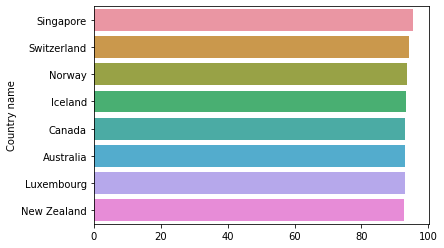

In [123]:
sn.set_palette('RdBu')
sn.barplot(country_total.values, country_total.index)
plt.show()

In [124]:
country_total1=df.groupby('Country name')['Log GDP per capita'].mean().sort_values(ascending=False).head(8)

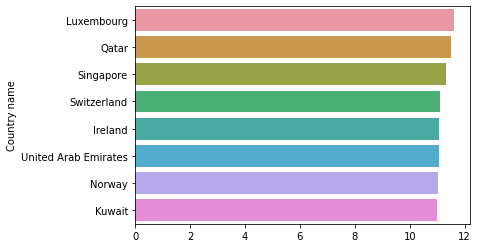

In [125]:
sn.set_palette('RdBu')
sn.barplot(country_total1.values, country_total1.index)
plt.show()

In [126]:
country_total2=df.groupby('Country name')['Healthy life expectancy at birth'].mean().sort_values(ascending=False).head(8)

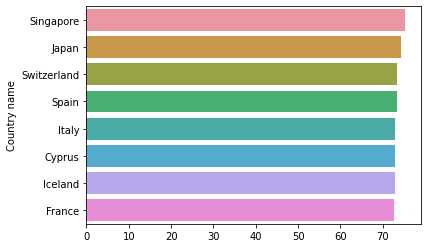

In [127]:
sn.set_palette('RdBu')
sn.barplot(country_total2.values, country_total2.index)
plt.show()

In [128]:
country_total3=df.groupby('Country name')['Social support'].mean().sort_values(ascending=False).head(8)

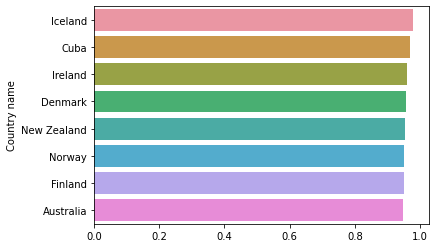

In [129]:
sn.set_palette('RdBu')
sn.barplot(country_total3.values, country_total3.index)
plt.show()

In [130]:
#top 10 un happiest countries

In [133]:
country_total4=df.groupby('Country name')['Total_score'].mean().sort_values(ascending=False).tail(10)

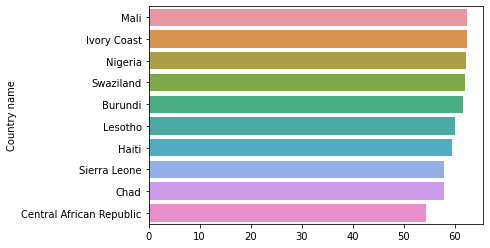

In [134]:
sn.set_palette('RdBu')
sn.barplot(country_total4.values, country_total4.index)
plt.show()

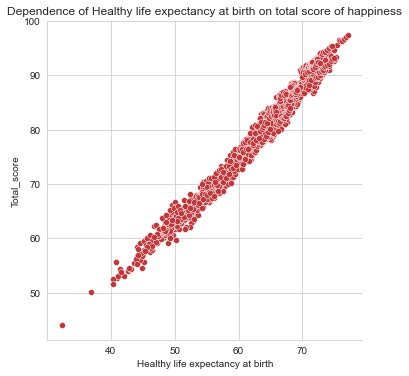

In [143]:
sn.set_style('whitegrid')
sn.relplot(x='Healthy life expectancy at birth', y='Total_score', data=df, kind='scatter').set(title='Dependence of Healthy life expectancy at birth on total score of happiness')
plt.show()

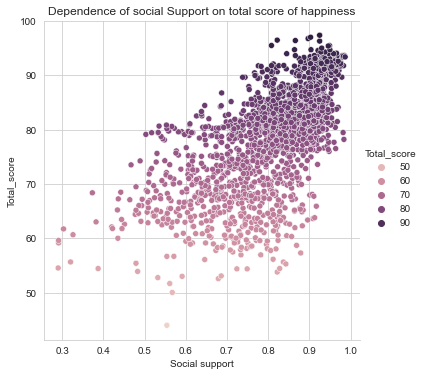

<function matplotlib.pyplot.grid(b=None, which='major', axis='both', **kwargs)>

In [144]:
sn.set_style('whitegrid')
sn.relplot(x='Social support', y='Total_score', data=df, kind='scatter',hue='Total_score').set(title='Dependence of social Support on total score of happiness')
plt.show()
plt.grid

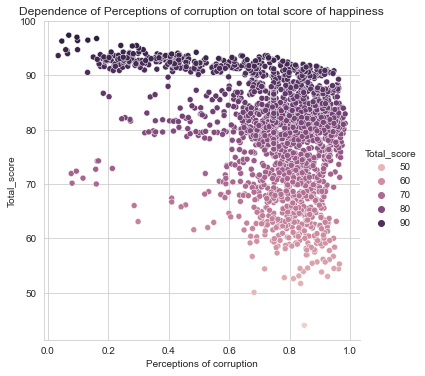

<function matplotlib.pyplot.grid(b=None, which='major', axis='both', **kwargs)>

In [145]:
sn.set_style('whitegrid')
sn.relplot(x='Perceptions of corruption', y='Total_score', data=df, kind='scatter',hue='Total_score').set(title='Dependence of Perceptions of corruption on total score of happiness')
plt.show()
plt.grid

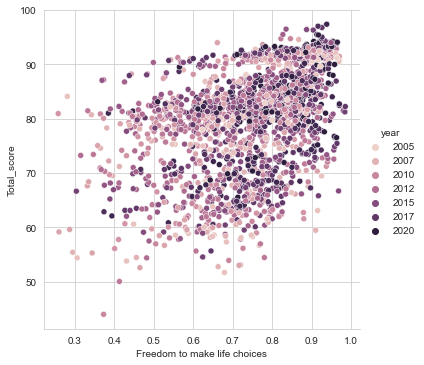

<function matplotlib.pyplot.grid(b=None, which='major', axis='both', **kwargs)>

In [149]:
sn.set_style('whitegrid')
sn.relplot(x='Freedom to make life choices', y='Total_score', data=df, kind='scatter',hue='year')
plt.show()
plt.grid

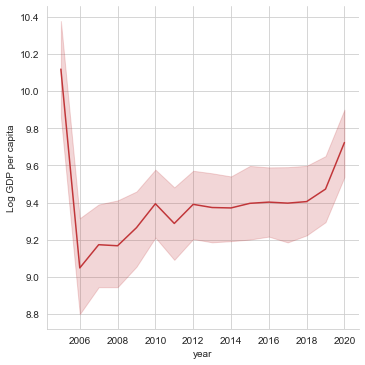

In [153]:
sn.relplot(x='year',y='Log GDP per capita',data=df,kind='line')
plt.show()

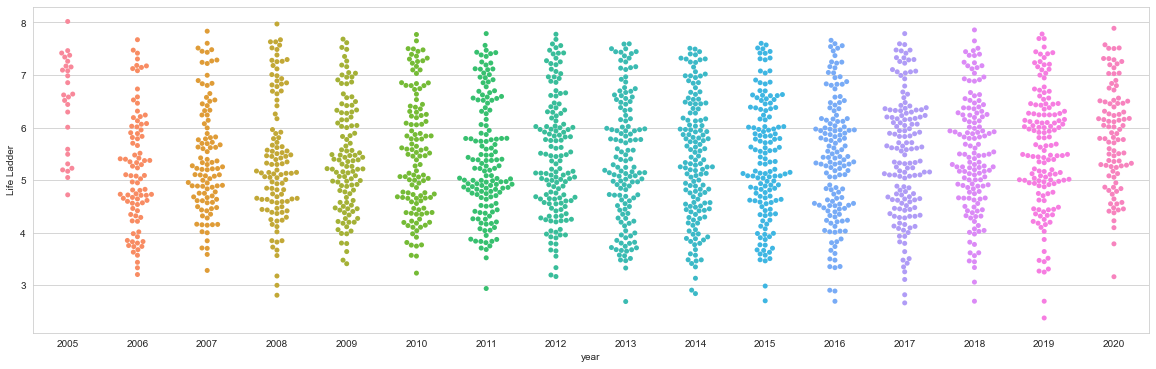

In [159]:
plt.figure(2,figsize=(20,6))
sn.swarmplot(x='year',y=df['Life Ladder'],data=df)
plt.show()